# What is ARIMA and Seasonal Arima ?

- It can Visualize the Time Series Data
- It can make Time Series stationary i.e,if mean,variance and corelation of data constant over time.
- It can Plot Correlation and AutoCorrelation Charts
- ARIMA or Seasonal ARIMA models can be built based on data
- Model can be used for predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('forcastingsales.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
# Cleaning the dataset
df.columns = ["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
# Drop the last two rows
df.drop(106,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [10]:
df.drop(105,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
# Change Month into Datetime
df["Month"] = pd.to_datetime(df["Month"])

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [18]:
df.set_index('Month',inplace=True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Visualize the data

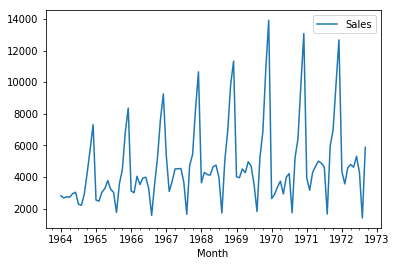

In [21]:
df.plot()

In [23]:
# Test the Stationarity
from statsmodels.tsa.stattools import adfuller

In [24]:
test_result = adfuller(df['Sales'])

In [25]:
# A: It is Non-Stationary
# B: It is Stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(A),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis,time series has a unit root,indicating it is non-stationary")

In [26]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.8335930563276237
p-value:0.3639157716602447
#Lags Used:11
Number of Observations Used:93
weak evidence against null hypothesis,time series has a unit root,indicating it is non-stationary


Differencing

In [27]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [28]:
df['Seasonal First Difference'] = df['Sales'] -df['Sales'].shift(12)

In [30]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [31]:
# Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics:-7.626619157213163
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observations Used:92
strong evidence against the null hypothesis(A),reject the null hypothesis. Data has no unit root and is stationary


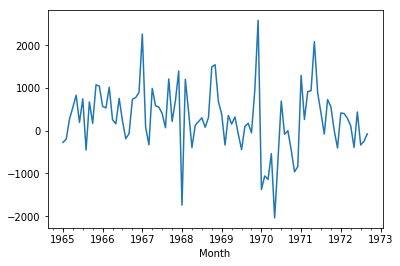

In [32]:
df['Seasonal First Difference'].plot()

Auto Regressive Model

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


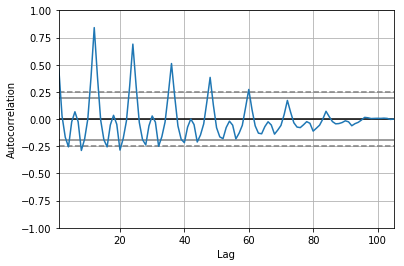

In [33]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# How does Autocorrelation and Partial Autocorrelation works ?#

**PACF is the best way to identify AR model.**
     <ol>In the AR model, the theoritical PACF "shuttsoff" past the order of the model.The Phrase "shuttsoff" means          that
      in the theory the partial autocorrelation are equal to 0 beyond that point. Put another way the number of non-zero
      partial autocorrelation gives the order of the AR model. By the "order of the model" we mean the most extreme tag
      of x that is used as a predictor.</ol>
**ACF is the best way to identify MA model rather than the PACF**
     <ol>In the MA model, the theoritical PACF does not shut off, But instead tappers toward 0 in some manner. A clearer
      pattern for an MA model is the ACF. The ACF will have non-zero autocorrelation only at tags involved in the     model</ol>

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

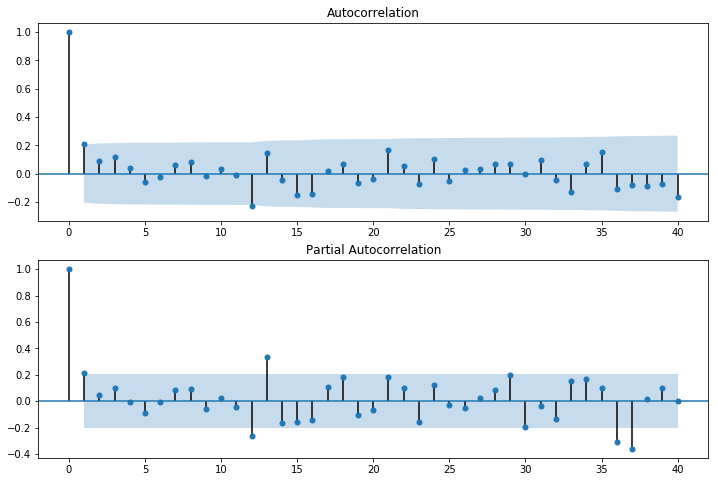

In [44]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax2)


In [45]:
# For non-seasonal data
# p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [46]:
model = ARIMA(df['Sales'],order = (1,1,1))
model_fit = model.fit()

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 25 Sep 2020   AIC                           1910.251
Time:                        16:02:39   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7854     12.405      1.837      0.069      -1.528      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

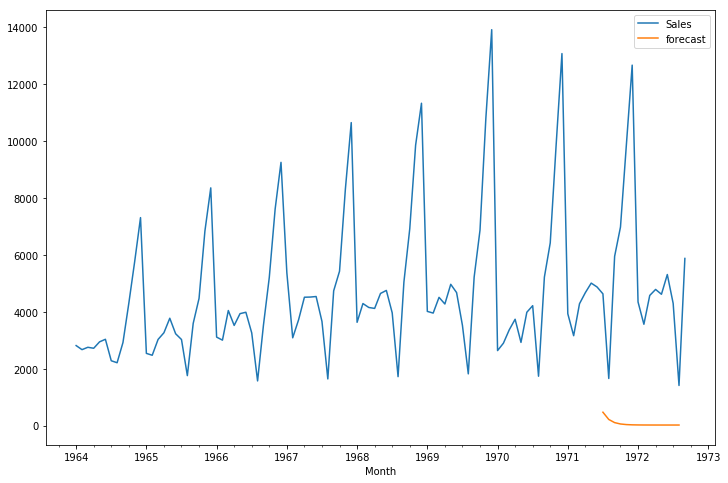

In [49]:
df['forecast'] = model_fit.predict(start = 90,end = 103,dynamic = True)
df[['Sales','forecast']].plot(figsize = (12,8))

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],orders = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


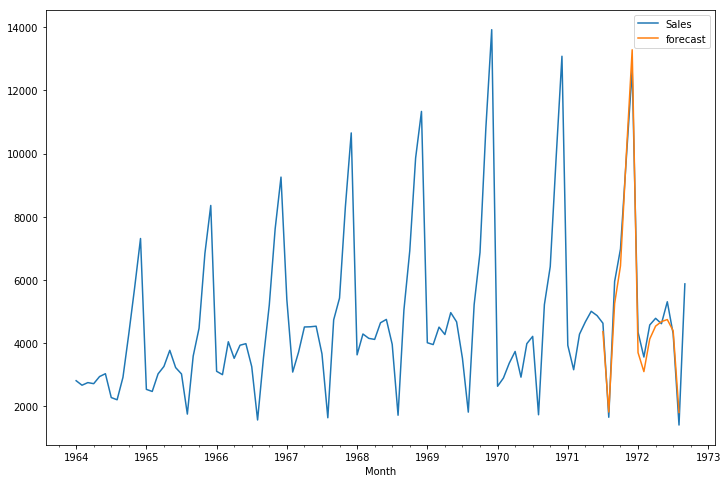

In [52]:
df['forecast'] = results.predict(start = 90,end = 103,dynamic = True)
df[['Sales','forecast']].plot(figsize = (12,8))

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x)for x in range(0,24)]

In [58]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns = df.columns)

In [61]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [62]:
future_df = pd.concat([df,future_datest_df])


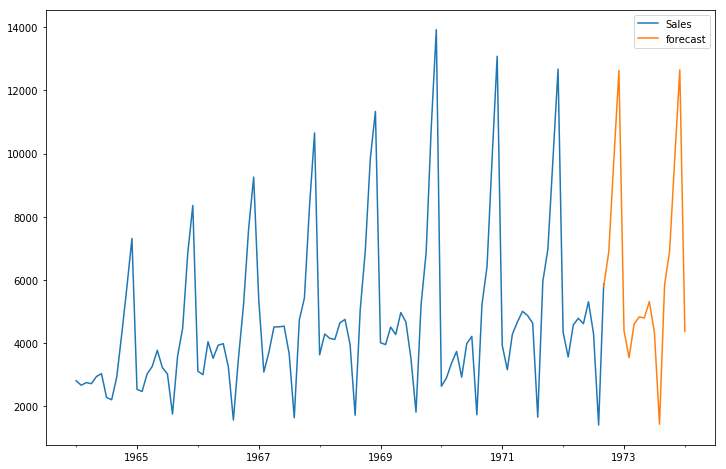

In [63]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales','forecast']].plot(figsize = (12,8))